Fizik ve matematikte bir problemle karşılaştığımızda problemi kağıt-kalem yardımıyla 'analitik' olarak çözemediğimizde yada bu şekilde çözmeye girişmeden önce çözüme dair bir fikir edinmek adına ufak tefek deneyler yapmak için 'simulasyon' dediğimiz, bilgisayar yardımıyla bir takım sayısal yöntemler kullanırız. Bu yöntemlere dair fikir vermek adına ünlü bir olasılık problemini 'Monte Carlo' yöntemi olarak adlandırılan ve rastgele üretilmiş sayıları kullanan bir simulasyon ile çözmeye çalışacağız. Problemimiz ünlü 'Monty Hall' problemi!


<img style="float: center;" src="https://4.bp.blogspot.com/-xcLySiYBymw/V7g05DGUSWI/AAAAAAAAATI/0IjFv_XBjfIUM1m9GaVAQgz_6AJq_CfjQCLcB/s640/monty%2Bhall%2Bparadoxu.jpg">

Bir yarışmadasınız ve önünüzde bir tanesinin arkasında ödül, ikisinin ardında 'keçi' olan üç kapı bulunuyor. Kapılardan arkasında ödül olanı seçtiğinizde ödülü alıyor, diğer kapıları seçtiğinizde hiçbir şey kazanamıyorsunuz. Sunucu bir kapıyı seçmenizi istiyor ve siz de seçiyorsunuz. Ardından sunucu kapılardan birini açıyor ve arkasından keçi çıkıyor. Size dönüp açtığı kapının arkasında keçi olduğunu gördüğünüz halde seçtiğiniz kapıyı değiştirip değiştirmeyeceğinizi soruyor. **Sizce kazanmak için kapıyı değiştirmeli misiniz?**

Problem 70'li yıllarda ortaya atılıyor ve değme matematikçilerin çözüm konusunda birbirine girmesine neden oluyor (hikayesi için <a href="https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/">tıklayınız</a>). Çözümünün, birçok basit olasılık probleminin çözümünde olduğu gibi, 'sağduyuya karşı' görünen yapısı, problemi epey ilginç ve popüler kılmış durumda. Basit olasılık argümanları ile seçtiğimiz kapıyı değiştirmenin mi yoksa değiştirmemenin mi avantajlı çıkacağı gösterilebilir fakat biz bunu birbirinin aynısı birçok deneme ile benzetim (simulasyon) yaparak bulmaya çalışacağız.

Simulasyon için ```Python``` programlama dili ve ``` Numpy``` kütüphanesini kullanacağız. Öncelikle ilgili kütüphaneleri çağıralım.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Yapacağımız şey belirli sayıda örnek oyunlar oynayıp, her seferinde rastgele seçimler yaparak seçimimizi değiştirdiğimizde mi yoksa seçimimiz aynı kaldığında mı daha sık kazanıyoruz, bunu gözlemek!

Öncelikle ödülün arkasında olduğu kapıyı simule edelim. ```nsim``` tane örnek kapı üreteceğiz. Kapılar $0$,$1$ ve $2$ değerleri alabiliyor. Bunun için ```numpy```ın ```random.randint``` fonksiyonunu kullanacağız. Bu fonksiyon verdiğiniz bir aralıkta (bizim için $0$ ve $3$) `size` ile belirleyeceğiniz sayıda düzgün dağılmış (eşit olasılıklı) rastgele tam sayılar üretiyor.

In [2]:
"""
Fonksiyon: simulasyon_odul

Ardında ödül olan kapıyı rastgele belirleyen fonksiyon.

Örnek
-------
>>> print simulasyon_odul(3)
array([0, 0, 2])
"""

def simulasyon_odul(nsim):
    odul = np.random.randint(0,3, size = nsim)
    return odul

Şimdi de tahminlerimizi üreteceğimiz fonksiyonu tanımlayalım. Yine aynı şekilde ```nsim``` tane $0$,$1$ ve $2$ olan rastgele kapı numaraları üretiyoruz. Bizim durumumuzda her seferinde başlangıçta 'rastgele'bir kapı seçiyor; fakat tamamen farklı bir yönemle, örneğin hep aynı kapıyı da seçtirebiliriz.

In [3]:
"""
Foksiyon: simulasyon_tahmin

Yarışmacının seçeceği kapıyı rastgele seçen fonksiyon. 

Örnek
-------
>>> print simulasyon_tahmin(5)
array([0, 0, 0, 0, 0])
"""

def simulasyon_tahmin(nsim):
    tahmin = np.random.randint(0,3, size = nsim)
    return tahmin

Sırada sunucunun açacağı ve arkasında 'keçi' olan kapıyı belirlemek var. Bunun için sunucunun her zaman arkasında 'keçi' olan kapıyı açacağını bildiğimizden, bizim seçimimize göre eğer seçtiğimizin arkasında keçi varsa diğer keçili kapıyı, ödül varsa diğer iki keçili kapıdan birini belirliyoruz.

In [4]:
"""
Fonksiyon: keci_kapi

Arkasında ödül olmayan (keçi olan) ve kişinin seçmediği kapılardan birini seçen fonksiyon

Örnek
--------
>>> print keci_kapi(np.array([0, 1, 2]), np.array([1, 1, 1]))
>>> array([2, 2, 0])
"""
def keci_kapi(odul, tahmin):
    acik = []
    for i in range(len(odul)):
        kapilar = [0,1,2]
        if(odul[i] == tahmin[i]):
            kapilar.remove(odul[i])
            acik.append(np.random.choice(kapilar))
        else:
            kapilar.remove(odul[i])
            kapilar.remove(tahmin[i])
            acik.append(kapilar[0])
    return np.array(acik)

Son olarak da tahmin değiştirme fonksiyonumuzu (```tahmin_degistir```) yazıyoruz. Bu fonksiyon tahminimizi ve sunucunun açtığı, arkasında keçi olan kapıyı girdi olarak alıyor ve tahmini değiştirdiği kapıyı döndürüyor.

In [5]:
"""
Fonksiyon: tahmin_degistir

Arkasında keçi olan kapı açıldığında her zaman seçtiği kapıyı değiştiren strateji

Örnek
--------
>>> print tahmin_degistir(np.array([0, 1, 2]), np.array([1, 2, 1]))
>>> array([2, 0, 0])
"""
def tahmin_degistir(tahmin, kecikapilar):
    degistir = []
    for i in range(len(odul)):
        kapilar = [0,1,2]
        if(kecikapilar[i] == tahmin[i]):
            kapilar.remove(kecikapilar[i])
            degistir.append(np.random.choice(kapilar))
        else:
            kapilar.remove(tahmin[i])
            kapilar.remove(kecikapilar[i])
            degistir.append(kapilar[0])
    return np.array(degistir)

Son olarak oynadığımız oyunlardan kapıyı değiştirdiklerimizin ve değiştirmediklerimizin kaçında kazandığımızı hesaplamak için bir fonksiyon belirliyoruz.

In [6]:
"""
Fonksiyon: kazanma_yuzdesi
Kazanma yüzdesini hesaplayan fonksiyon

Örnek
---------
>>> print kazanma_yuzdesi(np.array([0, 1, 2]), np.array([0, 0, 0]))
33.333
"""
def kazanma_yuzdesi(tahmin, odul):
    return np.sum(tahmin == odul)/float(len(tahmin))

Fonksiyonlarımızı belirledikten sonra şimdi simulasyona başlayalım. ```nsim```$=1000$ tane oyun oynayacağız. Tek tek ardından ödül olan ve tahmin ettiğimiz kapı değerlerini rastgele oluşturuyoruz. Sonrasında sunucunun seçeceği ve arkasında keçi çıkan kapıyı belirliyoruz. Sonrasında kapımızı değiştirip değiştirmeyeceğimize karar veriyoruz. Ardından elde ettiğimiz sonucu yazdırıyoruz.

In [7]:
nsim = 1000
odul = simulasyon_odul(nsim)
tahmin = simulasyon_tahmin(nsim)
kecikapilar = keci_kapi(odul,tahmin)
degistir = tahmin_degistir(tahmin,kecikapilar)

print("Eğer ilk seçtiği kapıyı değiştirmezse ", kazanma_yuzdesi(tahmin, odul))
print("Eğer ilk seçtiği kapıyı değiştirirse: ", kazanma_yuzdesi(degistir, odul))

Eğer ilk seçtiği kapıyı değiştirmezse  0.305
Eğer ilk seçtiği kapıyı değiştirirse:  0.695


Görüldüğü üzere kapıyı değiştirdiğinde %67'e yakın yani $\frac{2}{3}$ oranında kazanırken, değiştirmediğinde $\frac{1}{3}$ yakın bir oranda kazanıyor. Yani seçtiğiniz kapıyı değiştirmek en makul seçenek gibi görünüyor!

Bu oranın oynadığımız oyun sayısına bağlı olup olmadığını görmek için $1$'den başlayıp $10000$'e kadar $20$'şer artan sayılarda oyun oynayıp değiştirip değiştirmediği durumlarda kazanma yüzdesini çizdirelim, bakalım nasıl bir şey çıkacak ortaya.

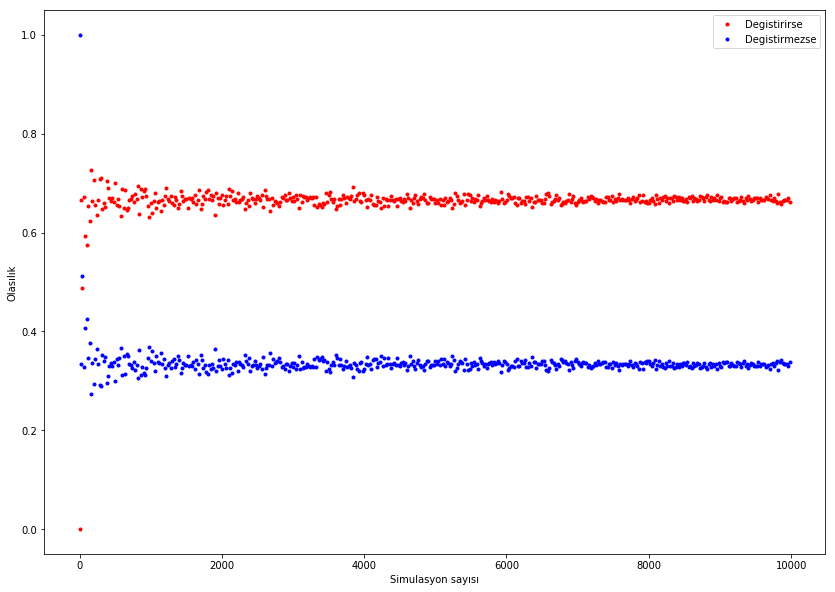

In [8]:
degistirirse = []
degistirmezse = []
for nsim in range(1,10000,20):
    odul = simulasyon_odul(nsim)
    tahmin = simulasyon_tahmin(nsim)
    kecikapilar = keci_kapi(odul,tahmin)
    degistir = tahmin_degistir(tahmin,kecikapilar)
    degistirirse.append(kazanma_yuzdesi(degistir, odul))
    degistirmezse.append(kazanma_yuzdesi(tahmin, odul))

plt.figure(figsize=(14,10))    
plt.plot(range(1,10000,20),degistirirse, 'r.', label='Degistirirse')
plt.plot(range(1,10000,20),degistirmezse, 'b.', label='Degistirmezse')
plt.xlabel('Simulasyon sayısı')
plt.ylabel('Olasılık')
plt.legend()
plt.show()
    

Gördüğünüz gibi ilk başta düşük sayıda oyun oynadığımızda olasılıklar değişkenlik gösterirken, 10-15 oyundan sonra sabit olasılıklara yani 0.33 ve 0.67 civarında sabitleniyor. Elbette rastgele oyunlar oynadığımız için bu değerler her seferinde tam olarak 0.33 ve 0.66 çıkmıyor ve bu durum Monte Carlo yöntemlerinin genel özelliği. Her ne kadar 'teorik' değerlerle birebir aynı olmasa da ona çok çok yakın olduğunu görüyoruz. 

Monte Carlo yöntemleri fizikte analitik çözümünü yapamadığımız birçok sistem hakkında bilgi edinmek ve birçok zor integrali hesaplamak için sık sık kullanılan yöntemlerden biri. Bu dönem bilgisayar mühendisliği bölümünden aldığım yüksek lisans Monte Carlo dersine konuya dair birçok şey öğrenme fırsatım oldu. Bu yazı yeni yılla birlikte bu dersin ardından öğrendiklerim üzerine hazırlayacağım Monte Carlo dizisi için ufak, eğlenceli bir açılış yazısı olsun istedim. İlerleyen günlerdeki yazılarda konuyu derinlemesine inceleyip aşağıdaki konu başlıklarına değinmeyi planlıyorum:
* Monte Carlo yöntemlerine giriş 
* Markov Zincirleri ve Monte Carlo (MCMC)
* Önem Örneklemesi ve Metropolis-Hastings Algoritması
* Gibbs Örneklemesi
* Hamilton Monte Carlo yöntemi
* Kesin Örnekleme, Propp-Wilson yöntemi ve Ising Modeli

Yeni yılda görüşmek üzere!

#### *Yazıda kullanılan kodlar Boğaziçi Ünv. Fizik Bölümünde bu dönem aldığım 'Machine Learning in Physics' dersinde yaptığımız bir ödevden uyarlanmıştır.